In [0]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display the first few rows of the dataset
print(df.head())

# General statistics of the dataset
print(df.describe())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [0]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

# Display the first few rows of the scaled data
print("First few rows of scaled data:")
print(scaled_data[:5])


Missing values in each column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
First few rows of scaled data:
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965 

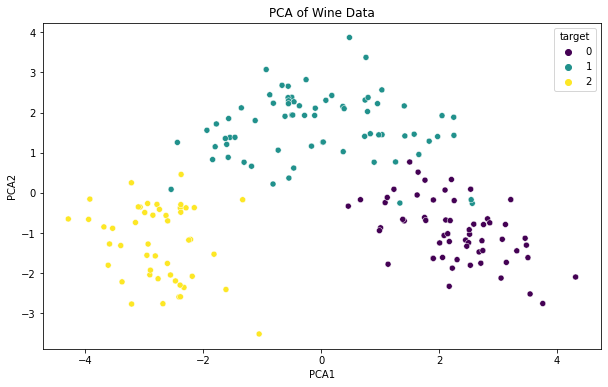

Explained Variance Ratio:
[0.36198848 0.1920749 ]


In [0]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['target'] = df['target']

# Visualization - Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA of Wine Data')
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


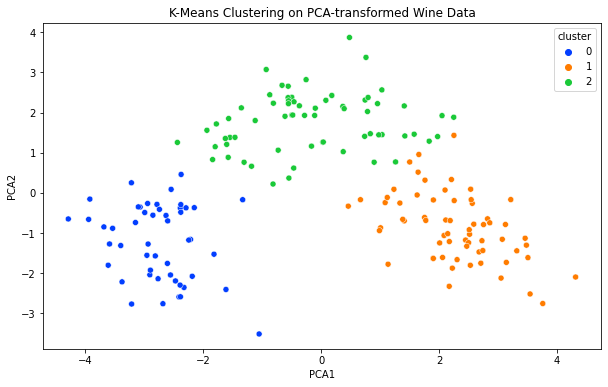

Silhouette Score for the clustering: 0.5610505693103248


In [0]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering on PCA data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Adding cluster information to the DataFrame
pca_df['cluster'] = clusters

# Visualization - Scatter plot with clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='bright')
plt.title('K-Means Clustering on PCA-transformed Wine Data')
plt.show()

# Silhouette Score for evaluation
silhouette_avg = silhouette_score(pca_data, clusters)
print("Silhouette Score for the clustering:", silhouette_avg)


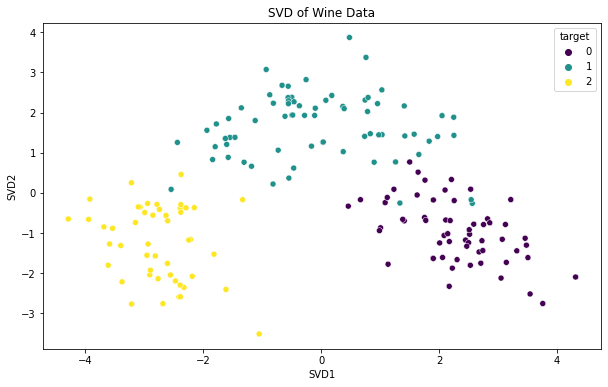

In [0]:
# Import necessary libraries
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# SVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(scaled_data)

# Create a DataFrame with SVD results
svd_df = pd.DataFrame(data=svd_data, columns=['SVD1', 'SVD2'])
svd_df['target'] = df['target']

# Visualization - Scatter plot for SVD results
plt.figure(figsize=(10,6))
sns.scatterplot(x='SVD1', y='SVD2', hue='target', data=svd_df, palette='viridis')
plt.title('SVD of Wine Data')
plt.show()


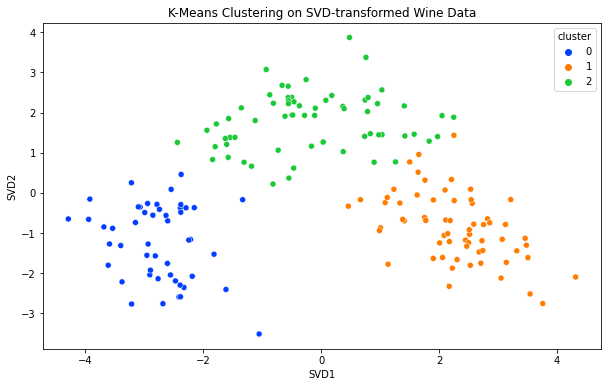

In [0]:
# K-Means Clustering on SVD data
svd_clusters = kmeans.fit_predict(svd_data)
svd_df['cluster'] = svd_clusters

# Visualization - Scatter plot with clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='SVD1', y='SVD2', hue='cluster', data=svd_df, palette='bright')
plt.title('K-Means Clustering on SVD-transformed Wine Data')
plt.show()


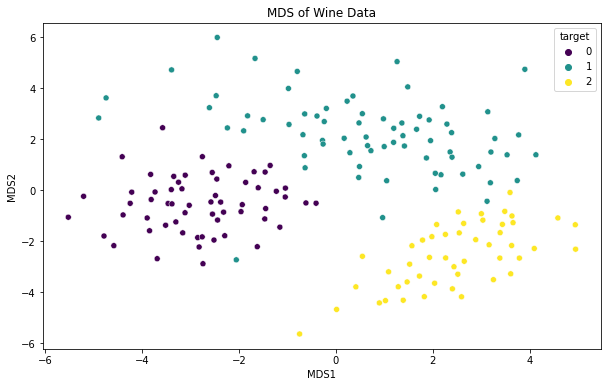

In [0]:
# Import necessary libraries
from sklearn.manifold import MDS

# MDS
mds = MDS(n_components=2, random_state=42)
mds_data = mds.fit_transform(scaled_data)

# Create a DataFrame with MDS results
mds_df = pd.DataFrame(data=mds_data, columns=['MDS1', 'MDS2'])
mds_df['target'] = df['target']

# Visualization - Scatter plot for MDS results
plt.figure(figsize=(10,6))
sns.scatterplot(x='MDS1', y='MDS2', hue='target', data=mds_df, palette='viridis')
plt.title('MDS of Wine Data')
plt.show()


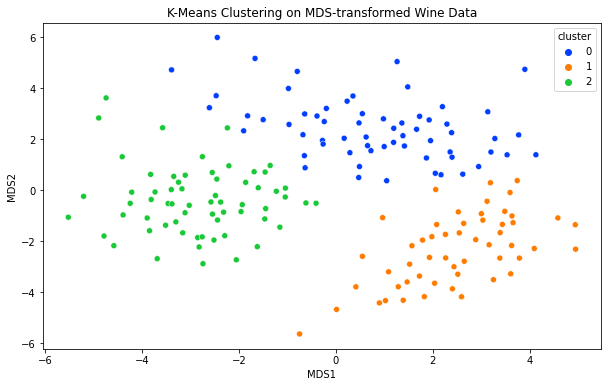

In [0]:
# K-Means Clustering on MDS data
mds_clusters = kmeans.fit_predict(mds_data)
mds_df['cluster'] = mds_clusters

# Visualization - Scatter plot with clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='MDS1', y='MDS2', hue='cluster', data=mds_df, palette='bright')
plt.title('K-Means Clustering on MDS-transformed Wine Data')
plt.show()


/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


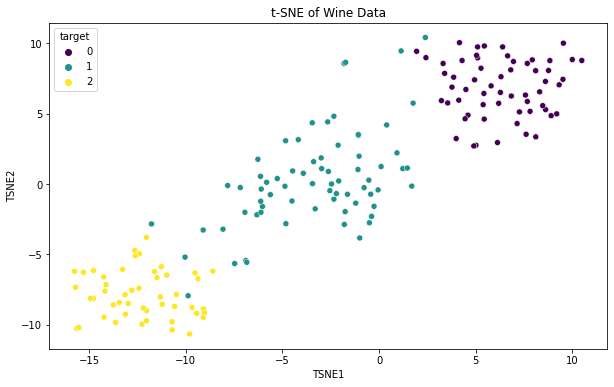

In [0]:
# Import necessary libraries
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['target'] = df['target']

# Visualization - Scatter plot for t-SNE results
plt.figure(figsize=(10,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='target', data=tsne_df, palette='viridis')
plt.title('t-SNE of Wine Data')
plt.show()


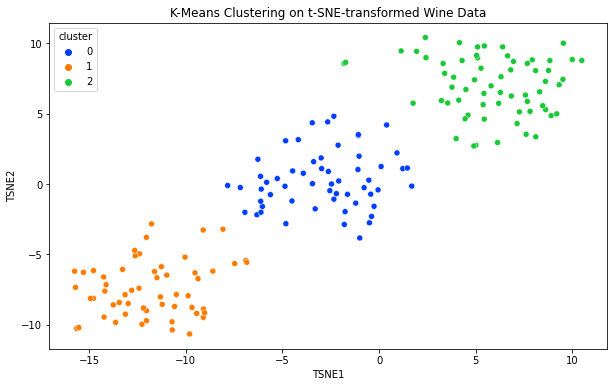

In [0]:
# K-Means Clustering on t-SNE data
tsne_clusters = kmeans.fit_predict(tsne_data)
tsne_df['cluster'] = tsne_clusters

# Visualization - Scatter plot with clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=tsne_df, palette='bright')
plt.title('K-Means Clustering on t-SNE-transformed Wine Data')
plt.show()


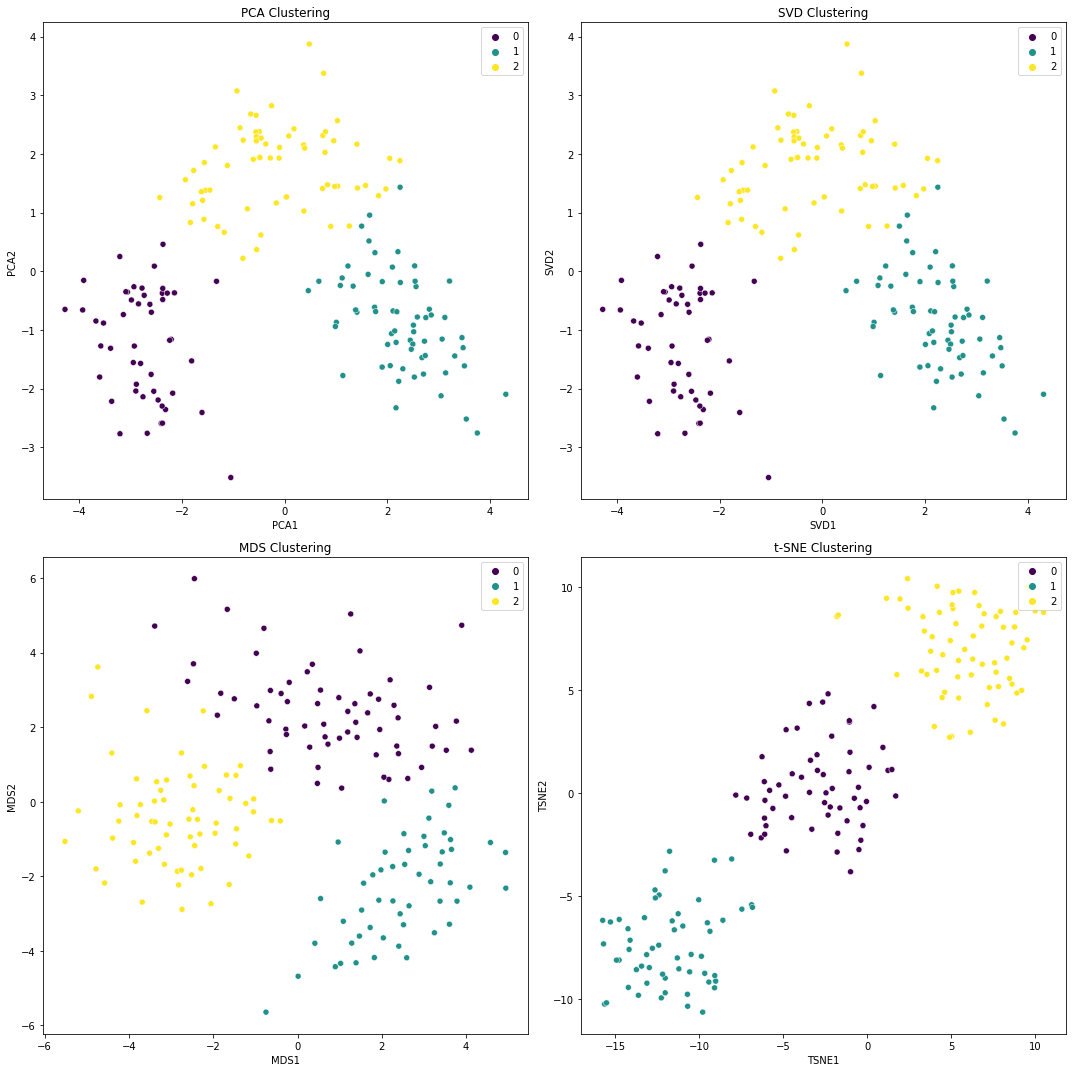

In [0]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function for creating scatter plots
def create_scatter_plot(df, x_col, y_col, hue_col, title, ax):
    sns.scatterplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ax=ax)
    ax.set_title(title)
    ax.legend(loc='upper right')

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Scatter plot for PCA results
create_scatter_plot(pca_df, 'PCA1', 'PCA2', 'cluster', 'PCA Clustering', axs[0, 0])

# Scatter plot for SVD results
create_scatter_plot(svd_df, 'SVD1', 'SVD2', 'cluster', 'SVD Clustering', axs[0, 1])

# Scatter plot for MDS results
create_scatter_plot(mds_df, 'MDS1', 'MDS2', 'cluster', 'MDS Clustering', axs[1, 0])

# Scatter plot for t-SNE results
create_scatter_plot(tsne_df, 'TSNE1', 'TSNE2', 'cluster', 't-SNE Clustering', axs[1, 1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [0]:
# Import necessary libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Function to calculate metrics
def calculate_clustering_metrics(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette_avg, davies_bouldin, calinski_harabasz

# Calculate metrics for each method
metrics_pca = calculate_clustering_metrics(pca_data, pca_df['cluster'])
metrics_svd = calculate_clustering_metrics(svd_data, svd_df['cluster'])
metrics_mds = calculate_clustering_metrics(mds_data, mds_df['cluster'])
metrics_tsne = calculate_clustering_metrics(tsne_data, tsne_df['cluster'])

# Print the metrics
print("PCA Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz", metrics_pca)
print("SVD Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz", metrics_svd)
print("MDS Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz", metrics_mds)
print("t-SNE Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz", metrics_tsne)


PCA Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz (0.5610505693103248, 0.5972661544221363, 344.7925948321)
SVD Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz (0.561050569028933, 0.5972661556982023, 344.79259439565305)
MDS Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz (0.4904380243806926, 0.7185878438682476, 208.12142305396958)
t-SNE Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz (0.61213034, 0.5228466507724497, 737.6479750619253)


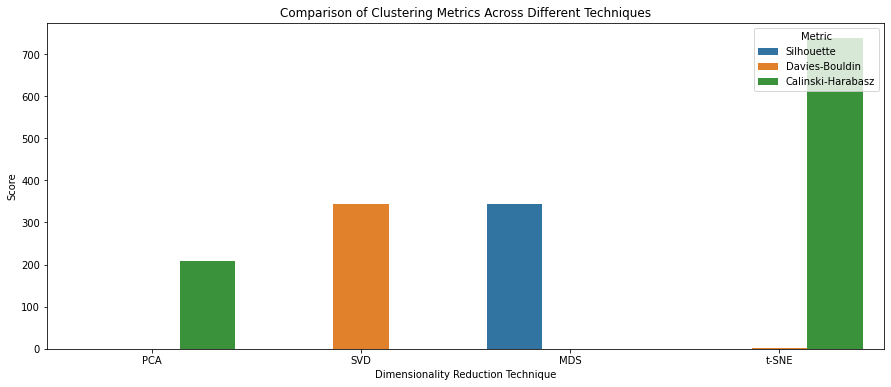

In [0]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Store the metrics in a dictionary for easy plotting
metrics_dict = {
    'Technique': ['PCA', 'SVD', 'MDS', 't-SNE']*3,
    'Metric': ['Silhouette']*4 + ['Davies-Bouldin']*4 + ['Calinski-Harabasz']*4,
    'Score': np.concatenate([np.array(metrics_pca), np.array(metrics_svd), 
                             np.array(metrics_mds), np.array(metrics_tsne)])
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Create bar plots
plt.figure(figsize=(15, 6))
sns.barplot(x='Technique', y='Score', hue='Metric', data=metrics_df)
plt.title('Comparison of Clustering Metrics Across Different Techniques')
plt.ylabel('Score')
plt.xlabel('Dimensionality Reduction Technique')
plt.legend(title='Metric', loc='upper right')
plt.show()
